<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/IDS_obj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/yeon524/openpack-dataset.git
%cd openpack-dataset
!pip install pandas matplotlib seaborn -q

Cloning into 'openpack-dataset'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 339 (delta 17), reused 10 (delta 9), pack-reused 304 (from 1)
Receiving objects: 100% (339/339), 46.75 MiB | 9.31 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (149/149), done.
/content/openpack-dataset


In [ ]:
# 1. 레포 클론
!git clone https://github.com/yeon524/openpack-dataset.git
%cd openpack-dataset/docs/data-collection

# 2. sessions.md 읽기
raw = []
with open('sessions.md', 'r', encoding='utf-8') as f:
    for line in f:
        if "|" in line and "Subject" not in line and "---" not in line:
            raw.append(line.strip())

# 3. 파싱하여 CSV로 변환
rows = []
for r in raw:
    parts = [x.strip() for x in r.split("|") if x.strip() != ""]
    rows.append(parts)

import pandas as pd

df = pd.DataFrame(rows, columns=["Subject","Session","Scenario","Duration","Periods","Start","End"])
df.head()

Cloning into 'openpack-dataset'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 339 (delta 17), reused 10 (delta 9), pack-reused 304 (from 1)
Receiving objects: 100% (339/339), 46.75 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/openpack-dataset/openpack-dataset/docs/data-collection


,Subject,Session,Scenario,Duration,Periods,Start,End
0,U0101,S0100,S1,35m36s,20,2021-10-14 11:25:34+09:00,2021-10-14 12:01:10+09:00
1,U0101,S0200,S1,28m54s,20,2021-10-14 13:17:42+09:00,2021-10-14 13:46:36+09:00
2,U0101,S0300,S1,28m58s,20,2021-10-14 14:09:10+09:00,2021-10-14 14:38:08+09:00
3,U0101,S0400,S1,30m55s,20,2021-10-14 14:59:48+09:00,2021-10-14 15:30:43+09:00
4,U0101,S0500,S1,27m35s,20,2021-10-14 15:54:05+09:00,2021-10-14 16:21:40+09:00


In [ ]:
import re
import numpy as np

def duration_to_sec(x):
    if pd.isna(x):
        return np.nan
    x = x.strip()

    # 정규표현식으로 mmss 패턴 잡기
    match = re.match(r"(\d+)m(\d+)s", x)
    if match:
        m = int(match.group(1))
        s = int(match.group(2))
        return m*60 + s

    # 위 패턴이 아니면 NaN 리턴
    return np.nan


In [ ]:
df['duration_sec'] = df['Duration'].apply(duration_to_sec)
df['duration_sec'].head()

,duration_sec
0,2136.0
1,1734.0
2,1738.0
3,1855.0
4,1655.0


In [ ]:
# 시나리오별 평균/중앙값/세션 수
scenario_stats = (
    df.groupby('Scenario')['duration_sec']
      .agg(['mean', 'median', 'count'])
      .reset_index()
)

scenario_stats

,Scenario,mean,median,count
0,"1,2,3,4,5,6,7,8,9,10,",NaN,NaN,0
1,"10,11,12,13,14,15,16,17,18,19,20,",NaN,NaN,0
2,"17,18,19,20,",NaN,NaN,0
3,ALL,NaN,NaN,0
4,S1,2019.666667,2058.0,54
5,S2,1846.350000,1779.0,20
6,S3,1698.050000,1681.0,20
7,S4,1388.600000,1344.0,10


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

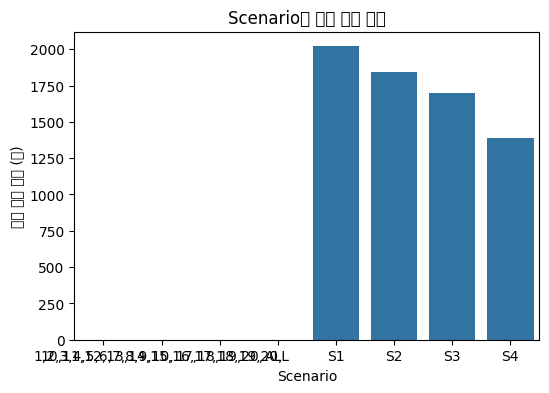

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(data=scenario_stats, x='Scenario', y='mean')
plt.title('Scenario별 평균 작업 시간')
plt.ylabel('평균 작업 시간 (초)')
plt.show()

In [ ]:
scenario_stats = (
    df.groupby('Scenario')['duration_sec']
      .mean()
      .reset_index()
)

scenario_stats


,Scenario,duration_sec
0,"1,2,3,4,5,6,7,8,9,10,",NaN
1,"10,11,12,13,14,15,16,17,18,19,20,",NaN
2,"17,18,19,20,",NaN
3,ALL,NaN
4,S1,2019.666667
5,S2,1846.350000
6,S3,1698.050000
7,S4,1388.600000


In [ ]:
df['Scenario'] = df['Scenario'].str.strip()

# 2. S1~S4만 남기기
valid = ['S1', 'S2', 'S3', 'S4']
df_clean = df[df['Scenario'].isin(valid)].copy()

df_clean['Scenario'].unique()

array(['S1', 'S2', 'S3', 'S4'], dtype=object)

In [ ]:
scenario_stats = (
    df_clean.groupby('Scenario')['duration_sec']
            .mean()
            .reset_index()
)


In [ ]:
order = ['S1', 'S2', 'S3', 'S4']
scenario_stats['Scenario'] = pd.Categorical(scenario_stats['Scenario'],
                                            categories=order,
                                            ordered=True)
scenario_stats = scenario_stats.sort_values('Scenario')
scenario_stats

,Scenario,duration_sec
0,S1,2019.666667
1,S2,1846.350000
2,S3,1698.050000
3,S4,1388.600000


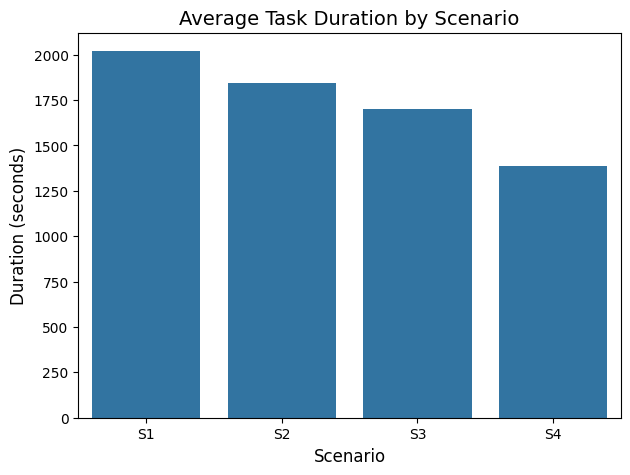

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(data=scenario_stats, x='Scenario', y='duration_sec')

plt.title("Average Task Duration by Scenario", fontsize=14)
plt.xlabel("Scenario", fontsize=12)
plt.ylabel("Duration (seconds)", fontsize=12)

plt.show()

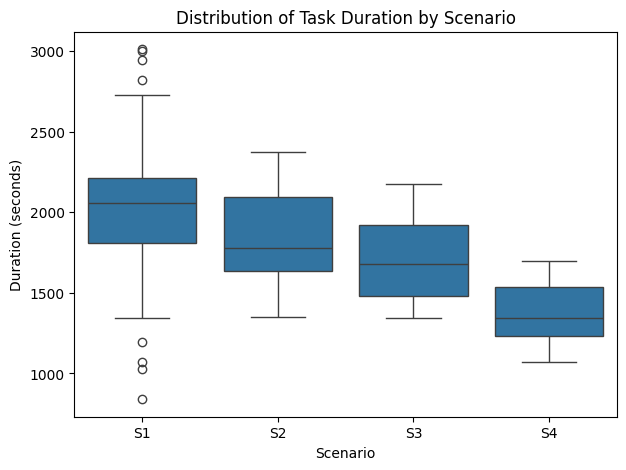

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_clean, x='Scenario', y='duration_sec')

plt.title("Distribution of Task Duration by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Duration (seconds)")
plt.show()

Raw dataframe shape: (104, 7)


,Subject,Session,Scenario,Duration,Periods,Start,End
0,U0101,S0100,S1,35m36s,20,2021-10-14 11:25:34+09:00,2021-10-14 12:01:10+09:00
1,U0101,S0200,S1,28m54s,20,2021-10-14 13:17:42+09:00,2021-10-14 13:46:36+09:00
2,U0101,S0300,S1,28m58s,20,2021-10-14 14:09:10+09:00,2021-10-14 14:38:08+09:00
3,U0101,S0400,S1,30m55s,20,2021-10-14 14:59:48+09:00,2021-10-14 15:30:43+09:00
4,U0101,S0500,S1,27m35s,20,2021-10-14 15:54:05+09:00,2021-10-14 16:21:40+09:00


Cleaned dataframe shape: (104, 8)
Scenarios: ['S1' 'S2' 'S3' 'S4']

Average duration (sec) by scenario


,Scenario,duration_sec
0,S1,2019.666667
1,S2,1846.350000
2,S3,1698.050000
3,S4,1388.600000



Average periods by scenario


,Scenario,Periods
0,S1,19.037037
1,S2,20.000000
2,S3,19.600000
3,S4,19.500000



Efficiency (sec per period) by scenario


,Scenario,sec_per_period
0,S1,106.336633
1,S2,92.317500
2,S3,87.145833
3,S4,71.220000


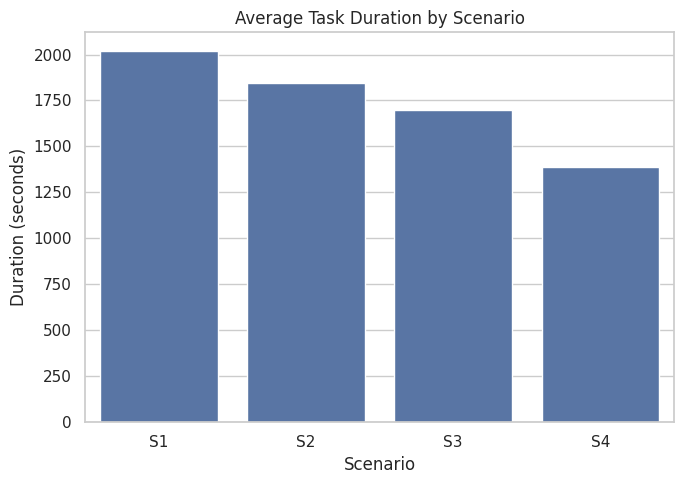

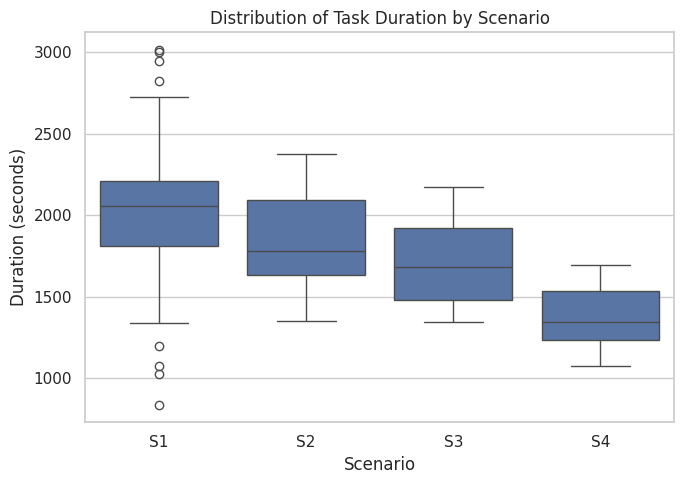

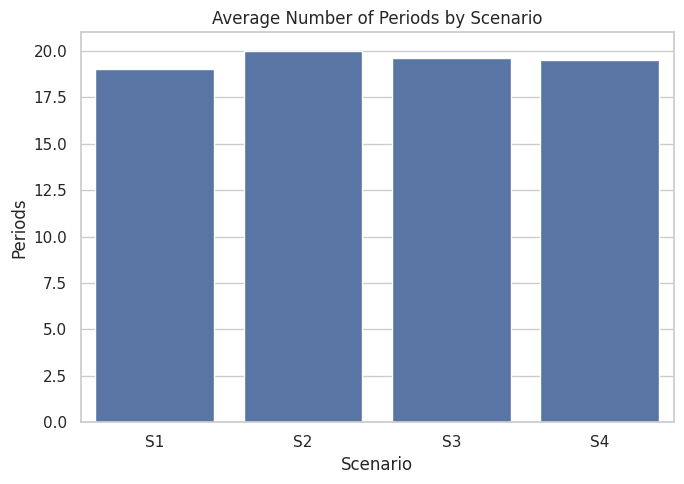

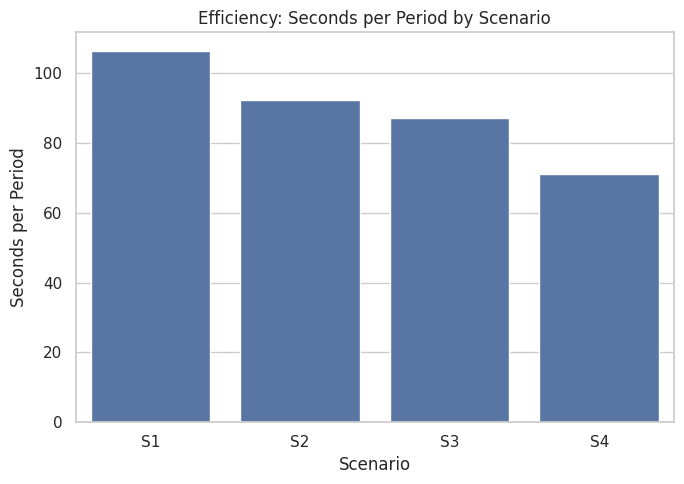

In [ ]:
# === 0. 기본 세팅 & 레포 클론 =====================================
!rm -rf openpack-dataset
!git clone https://github.com/yeon524/openpack-dataset.git -q

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("/content/openpack-dataset/docs/data-collection")

# === 1. sessions.md에서 테이블 파싱 ================================

rows = []
with open("sessions.md", "r", encoding="utf-8") as f:
    for line in f:
        # 파이프 없는 줄 / 헤더 / 구분선은 스킵
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue

        # 진짜 세션 행만 사용 (Subject ID가 U0xxx 형태)
        if not parts[0].startswith("U0"):
            continue

        # 기대하는 컬럼 수: 7개 (Subject, Session, Scenario, Duration, Periods, Start, End)
        if len(parts) >= 7:
            rows.append(parts[:7])

df = pd.DataFrame(rows, columns=["Subject","Session","Scenario",
                                 "Duration","Periods","Start","End"])

print("Raw dataframe shape:", df.shape)
display(df.head())

# === 2. Duration 문자열을 초(second)로 변환 ========================

def duration_to_sec(x):
    if pd.isna(x):
        return np.nan
    x = x.strip()
    m = re.match(r"(\d+)m(\d+)s", x)
    if m:
        minutes = int(m.group(1))
        seconds = int(m.group(2))
        return minutes * 60 + seconds
    return np.nan  # 예상 패턴 아니면 NaN

df["duration_sec"] = df["Duration"].apply(duration_to_sec)

# === 3. Scenario 정리: S1~S4만 사용 ================================

df["Scenario"] = df["Scenario"].str.strip()
valid_scenarios = ["S1","S2","S3","S4"]
df_clean = df[df["Scenario"].isin(valid_scenarios)].copy()

print("Cleaned dataframe shape:", df_clean.shape)
print("Scenarios:", df_clean["Scenario"].unique())

# === 4. Periods를 숫자로 변환 ======================================

df_clean["Periods"] = pd.to_numeric(df_clean["Periods"], errors="coerce")
df_clean = df_clean.dropna(subset=["Periods"])

# === 5. 시나리오별 통계 계산 =======================================

# (1) 평균 작업 시간
scenario_stats = (
    df_clean.groupby("Scenario")["duration_sec"]
            .mean()
            .reset_index()
)

# S1~S4 순서 정렬
order = ["S1","S2","S3","S4"]
scenario_stats["Scenario"] = pd.Categorical(scenario_stats["Scenario"],
                                            categories=order,
                                            ordered=True)
scenario_stats = scenario_stats.sort_values("Scenario")

print("\nAverage duration (sec) by scenario")
display(scenario_stats)

# (2) 시나리오별 평균 Periods
period_stats = (
    df_clean.groupby("Scenario")["Periods"]
            .mean()
            .reset_index()
)

period_stats["Scenario"] = pd.Categorical(period_stats["Scenario"],
                                          categories=order,
                                          ordered=True)
period_stats = period_stats.sort_values("Scenario")

print("\nAverage periods by scenario")
display(period_stats)

# (3) 효율: Seconds per Period
df_clean["sec_per_period"] = df_clean["duration_sec"] / df_clean["Periods"]

eff_stats = (
    df_clean.groupby("Scenario")["sec_per_period"]
            .mean()
            .reset_index()
)

eff_stats["Scenario"] = pd.Categorical(eff_stats["Scenario"],
                                       categories=order,
                                       ordered=True)
eff_stats = eff_stats.sort_values("Scenario")

print("\nEfficiency (sec per period) by scenario")
display(eff_stats)

# === 6. 시각화 =====================================================

sns.set(style="whitegrid")

# (A) Scenario별 평균 작업 시간
plt.figure(figsize=(7,5))
sns.barplot(data=scenario_stats, x="Scenario", y="duration_sec")
plt.title("Average Task Duration by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Duration (seconds)")
plt.tight_layout()
plt.show()

# (B) Scenario별 작업 시간 분포 (Boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(data=df_clean, x="Scenario", y="duration_sec",
            order=order)
plt.title("Distribution of Task Duration by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Duration (seconds)")
plt.tight_layout()
plt.show()

# (C) Scenario별 평균 Periods
plt.figure(figsize=(7,5))
sns.barplot(data=period_stats, x="Scenario", y="Periods")
plt.title("Average Number of Periods by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Periods")
plt.tight_layout()
plt.show()

# (D) Scenario별 효율 (Seconds per Period)
plt.figure(figsize=(7,5))
sns.barplot(data=eff_stats, x="Scenario", y="sec_per_period")
plt.title("Efficiency: Seconds per Period by Scenario")
plt.xlabel("Scenario")
plt.ylabel("Seconds per Period")
plt.tight_layout()
plt.show()


=== Worker-level speed & consistency (전체 세션 기준) ===


,Subject,mean,std,count,cv
3,U0104,2294.25,870.376308,4,0.379373
1,U0102,2277.00,457.419938,5,0.200887
8,U0109,2216.60,298.738682,5,0.134773
7,U0108,2191.80,131.968557,5,0.060210
10,U0111,2180.60,286.267882,5,0.131279
4,U0105,2140.60,192.986528,5,0.090155
5,U0106,2063.40,682.802900,5,0.330912
13,U0203,1940.60,232.493656,5,0.119805
15,U0205,1865.40,258.640291,5,0.138651
11,U0201,1823.60,434.876189,5,0.238471


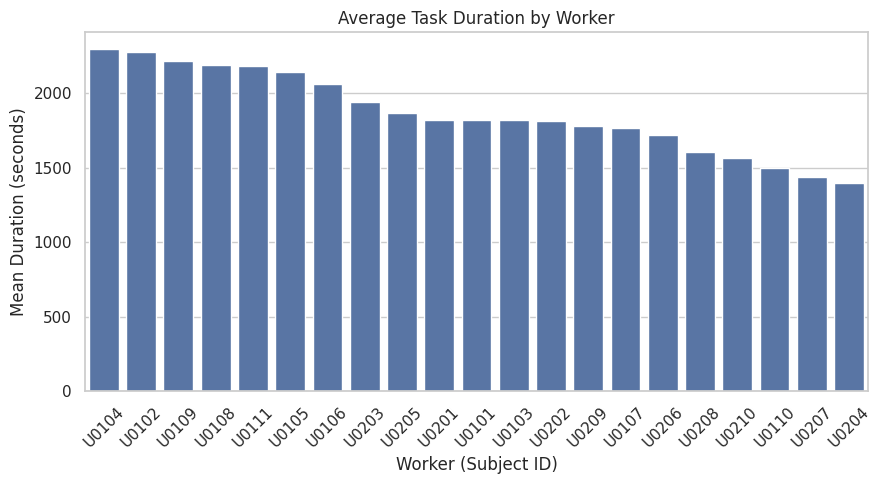

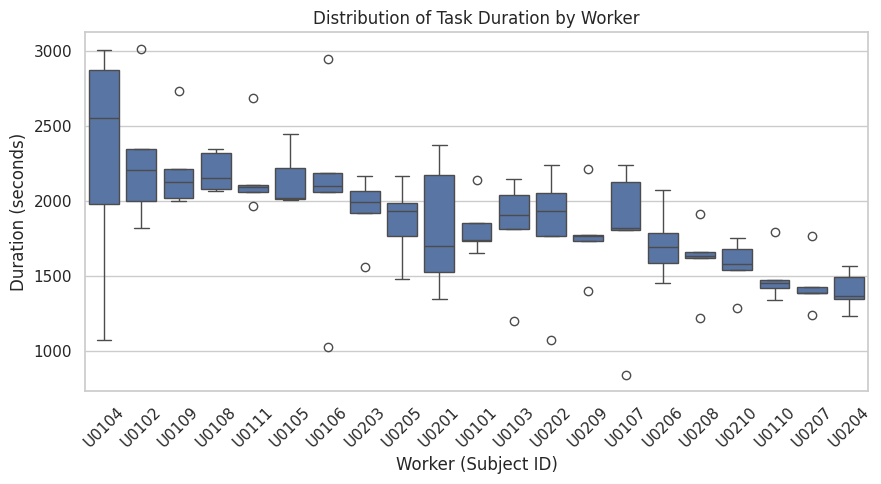

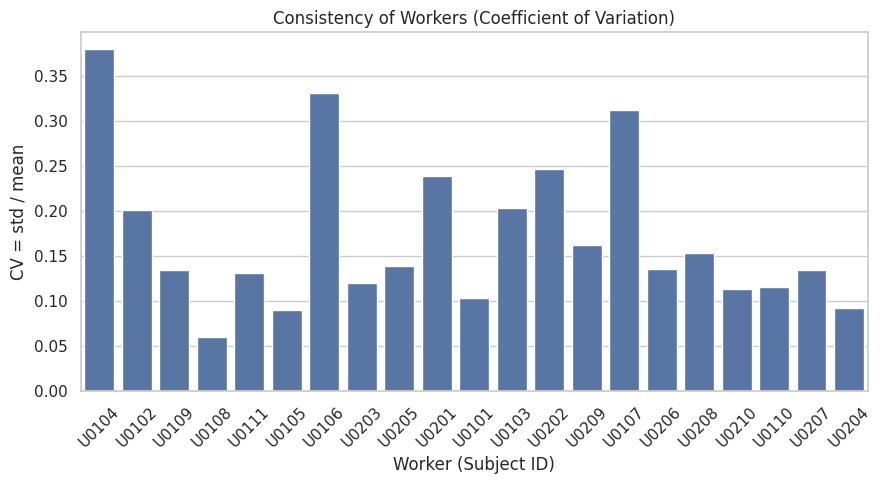

=== Average duration by Worker x Scenario ===


Scenario,S1,S2,S3,S4
Subject,,,,
U0101,1823.60,NaN,NaN,NaN
U0102,2277.00,NaN,NaN,NaN
U0103,1820.20,NaN,NaN,NaN
U0104,2294.25,NaN,NaN,NaN
U0105,2140.60,NaN,NaN,NaN
U0106,2063.40,NaN,NaN,NaN
U0107,1765.40,NaN,NaN,NaN
U0108,2191.80,NaN,NaN,NaN
U0109,2216.60,NaN,NaN,NaN


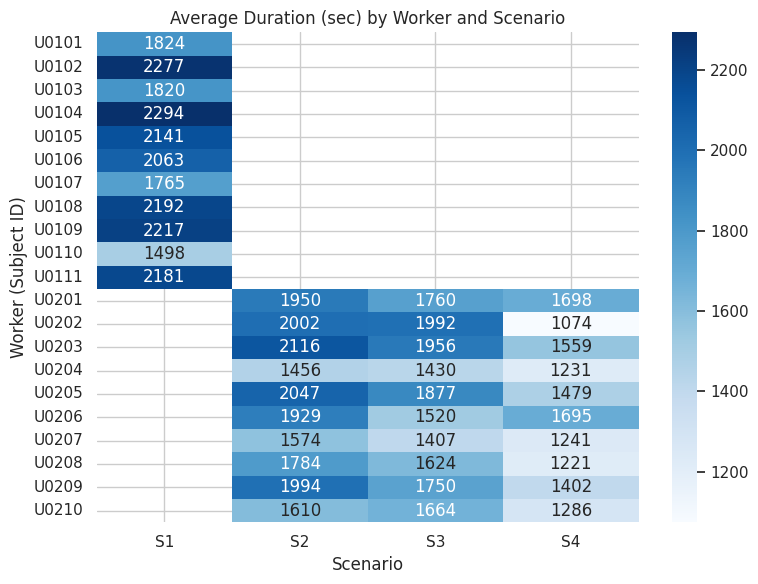

In [ ]:
# ============================================
#  Worker(Subject)별 속도 & 일관성 분석
#  (df_clean 이 이미 존재한다고 가정)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Worker(Subject)별 기본 통계 ==============================
worker_stats = (
    df_clean.groupby("Subject")["duration_sec"]
            .agg(["mean", "std", "count"])
            .reset_index()
)

# 일관성 지표: 표준편차 / 평균  (Coefficient of Variation)
worker_stats["cv"] = worker_stats["std"] / worker_stats["mean"]

# 평균 시간 기준으로 정렬 (느린 사람 순)
worker_stats = worker_stats.sort_values("mean", ascending=False)

print("=== Worker-level speed & consistency (전체 세션 기준) ===")
display(worker_stats)

# 2) 시각화 1: Worker별 평균 작업 시간 =========================
plt.figure(figsize=(9,5))
sns.barplot(data=worker_stats, x="Subject", y="mean")
plt.title("Average Task Duration by Worker")
plt.xlabel("Worker (Subject ID)")
plt.ylabel("Mean Duration (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) 시각화 2: Worker별 작업 시간 분포(Boxplot) =================
plt.figure(figsize=(9,5))
sns.boxplot(data=df_clean, x="Subject", y="duration_sec",
            order=worker_stats["Subject"])  # 위에서 정렬한 순서대로
plt.title("Distribution of Task Duration by Worker")
plt.xlabel("Worker (Subject ID)")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) 시각화 3: Worker별 일관성(CV) ============================
plt.figure(figsize=(9,5))
sns.barplot(data=worker_stats, x="Subject", y="cv")
plt.title("Consistency of Workers (Coefficient of Variation)")
plt.xlabel("Worker (Subject ID)")
plt.ylabel("CV = std / mean")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5) 추가: Scenario x Worker 교차 테이블 (평균 시간) ==============
scenario_worker_stats = (
    df_clean.groupby(["Subject", "Scenario"])["duration_sec"]
            .mean()
            .reset_index()
            .pivot(index="Subject", columns="Scenario", values="duration_sec")
)

print("=== Average duration by Worker x Scenario ===")
display(scenario_worker_stats)

plt.figure(figsize=(8,6))
sns.heatmap(scenario_worker_stats, annot=True, fmt=".0f",
            cmap="Blues")
plt.title("Average Duration (sec) by Worker and Scenario")
plt.xlabel("Scenario")
plt.ylabel("Worker (Subject ID)")
plt.tight_layout()
plt.show()


In [ ]:
# ============================================
# Objective 2: Task Complexity & Item Characteristics
#  - 상품 크기/수량/부피  ↔  작업 시간 관계 분석
# ============================================

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --------------------------------------------
# 0. OpenPack 저장소 준비 (이미 clone 했으면 건너뜀)
# --------------------------------------------
if not os.path.exists("openpack-dataset"):
    !git clone https://github.com/yeon524/openpack-dataset.git

BASE_DIR = "openpack-dataset"

# --------------------------------------------
# 1. items.csv : 상품 물리적 특성 (크기, 부피)
# --------------------------------------------
items_path = os.path.join(BASE_DIR, "data", "items.csv")
items = pd.read_csv(items_path)

# 숫자형으로 변환 (혹시 문자열이면)
for col in ["height_cm", "width_cm", "depth_cm"]:
    items[col] = pd.to_numeric(items[col], errors="coerce")

# 상품 1개당 부피(cm^3)
items["volume_cm3"] = items["height_cm"] * items["width_cm"] * items["depth_cm"]

items_small = items[["item_id", "size_category", "volume_cm3"]]
print("items 샘플")
print(items_small.head())

# --------------------------------------------
# 2. order-list : 주문별 item 정보 + 수량
#    (U0101.csv ~ U0210.csv 전부 로드)
# --------------------------------------------
order_dir = os.path.join(BASE_DIR, "data", "openpack", "order-list")
order_files = sorted(glob.glob(os.path.join(order_dir, "U*.csv")))

order_list = []
for f in order_files:
    user_id = os.path.basename(f).split(".")[0]  # U0101 같은 ID
    df = pd.read_csv(f)
    df["user"] = user_id
    order_list.append(df)

orders_raw = pd.concat(order_list, ignore_index=True)

print("\norder-list 샘플")
print(orders_raw.head())

# --------------------------------------------
# 3. order-list wide → long 변환
#    (item1~item5, amount1~amount5 펼치기)
# --------------------------------------------
item_cols = [f"item{i}" for i in range(1, 6)]
amt_cols  = [f"amount{i}" for i in range(1, 6)]

# wide → long
long_rows = []
for i in range(1, 6):
    tmp = orders_raw[["user", "session", "box", "sheet_no", "total_amount"]].copy()
    tmp["item_id"] = orders_raw[f"item{i}"]
    tmp["amount"]  = orders_raw[f"amount{i}"]
    long_rows.append(tmp)

orders_long = pd.concat(long_rows, ignore_index=True)

# item_id가 NaN 이거나 amount 0/NaN 인 행은 제거
orders_long = orders_long.dropna(subset=["item_id"])
orders_long = orders_long[orders_long["amount"].fillna(0) > 0]

# item_id 정수형으로 통일
orders_long["item_id"] = orders_long["item_id"].astype(int)

print("\nlong format 샘플")
print(orders_long.head())

# --------------------------------------------
# 4. items와 join → 주문별 총 부피/평균 부피 계산
# --------------------------------------------
orders_long = orders_long.merge(items_small, on="item_id", how="left")

# 각 행: 특정 주문 내 특정 item의 "총 부피"
orders_long["item_total_volume"] = orders_long["volume_cm3"] * orders_long["amount"]

# 주문 단위 집계 (user, session, box, sheet_no 기준)
order_complexity = (
    orders_long
    .groupby(["user", "session", "box", "sheet_no"], as_index=False)
    .agg(
        total_items=("amount", "sum"),              # 전체 수량
        n_unique_items=("item_id", "nunique"),      # 서로 다른 상품 종류 수
        total_volume=("item_total_volume", "sum"),  # 주문 전체 부피
        mean_item_volume=("volume_cm3", "mean"),    # 상품 1개 평균 부피
    )
)

# total_amount(원래 order-list에 있던 값)도 가져와 비교용
order_complexity = order_complexity.merge(
    orders_raw[["user", "session", "box", "sheet_no", "total_amount"]],
    on=["user", "session", "box", "sheet_no"],
    how="left"
)

print("\n주문 복잡도(order_complexity) 샘플")
print(order_complexity.head())

# --------------------------------------------
# 5. openpack-operations-1hz 로부터 작업 시간(duration) 계산
#    - 1Hz → 행 개수 = 초 단위 작업 시간
# --------------------------------------------
ops_files = sorted(
    glob.glob(
        os.path.join(BASE_DIR, "data", "openpack", "v1.0.0", "U*", "annotation",
                     "openpack-operations-1hz", "S0500.csv")
    )
)

ops_list = []
for f in ops_files:
    # .../U0209/annotation/.../S0500.csv → U0209 추출
    user_id = f.split(os.sep)[-4]
    df = pd.read_csv(f)
    df["user"] = user_id
    ops_list.append(df)

ops = pd.concat(ops_list, ignore_index=True)

print("\noperations-1hz 샘플")
print(ops.head())

# duration_sec = 해당 (user, session, box)의 1Hz row 개수
duration = (
    ops.groupby(["user", "session", "box"], as_index=False)
       .size()
       .rename(columns={"size": "duration_sec"})
)

print("\n작업 시간(duration_sec) 샘플")
print(duration.head())

# --------------------------------------------
# 6. 주문 복잡도 + 작업 시간 병합
# --------------------------------------------
data = order_complexity.merge(
    duration,
    on=["user", "session", "box"],
    how="inner"
)

print("\n최종 분석 데이터 샘플")
print(data.head())

# --------------------------------------------
# 7. 간단한 상관계수 확인
# --------------------------------------------
corr_cols = ["duration_sec", "total_items", "n_unique_items",
             "total_volume", "mean_item_volume", "total_amount"]

print("\n상관계수 (duration_sec 과의 관계)")
print(data[corr_cols].corr()["duration_sec"].sort_values(ascending=False))

# --------------------------------------------
# 8. 시각화 1: total_items ↔ duration_sec
# --------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(data=data, x="total_items", y="duration_sec", scatter_kws={"alpha":0.3})
plt.title("Total Items vs Task Duration")
plt.xlabel("Total Items in Order")
plt.ylabel("Task Duration (sec)")
plt.show()

# --------------------------------------------
# 9. 시각화 2: total_volume ↔ duration_sec
# --------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(data=data, x="total_volume", y="duration_sec", scatter_kws={"alpha":0.3})
plt.title("Total Volume vs Task Duration")
plt.xlabel("Total Volume of Order (cm^3)")
plt.ylabel("Task Duration (sec)")
plt.show()

# --------------------------------------------
# 10. 시각화 3: 주문 크기(부피)에 따른 작업시간 Boxplot
#     - total_volume 를 3~4구간으로 쪼개서 보기
# --------------------------------------------
# 분위수 기반 구간 나누기
data["volume_bin"] = pd.qcut(data["total_volume"], q=4, labels=["Q1 (small)", "Q2", "Q3", "Q4 (large)"])

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="volume_bin", y="duration_sec")
plt.title("Task Duration by Order Volume Quartile")
plt.xlabel("Order Volume Quartile")
plt.ylabel("Task Duration (sec)")
plt.show()

# --------------------------------------------
# 11. 시각화 4: item 개수에 따른 작업시간 Boxplot
# --------------------------------------------
data["item_bin"] = pd.qcut(data["total_items"], q=4, labels=["Q1 (few)", "Q2", "Q3", "Q4 (many)"])

plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="item_bin", y="duration_sec")
plt.title("Task Duration by Total Items Quartile")
plt.xlabel("Total Items Quartile")
plt.ylabel("Task Duration (sec)")
plt.show()


Cloning into 'openpack-dataset'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 339 (delta 17), reused 10 (delta 9), pack-reused 304 (from 1)
Receiving objects: 100% (339/339), 46.75 MiB | 24.55 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (149/149), done.


KeyError: 'height_cm'

In [ ]:
import pandas as pd

items = pd.read_csv("/content/openpack-dataset/data/items.csv")

items.head()

,item_id,name,JAN_code,height__cm,width__cm,depth__cm,size_category,amount,url
0,101,Panasonic 5 AA battery pack 1,4902704218810,9.0,7.0,3.0,0-10cm,1,NaN
1,102,Panasonic 5 AA battery pack 2,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN
2,103,Panasonic 5 AA battery pack 3,4973934413047,9.0,7.0,3.0,0-10cm,1,NaN
3,104,Panasonic 5 AA battery pack 4,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN
4,105,Panasonic 5 AA battery pack 5,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN


In [ ]:
import pandas as pd

# 1. items 데이터 다시 읽기 (이미 읽었으면 이 줄은 생략해도 됨)
items = pd.read_csv("/content/openpack-dataset/data/items.csv")

# 2. 컬럼 이름 정리: height__cm → height_cm 이런 식으로 통일
items = items.rename(columns={
    "height__cm": "height_cm",
    "width__cm": "width_cm",
    "depth__cm": "depth_cm"
})

print(items.columns)  # 이름 제대로 바뀌었는지 확인용

# 3. 물리적 크기 지표(볼륨) 만들기 예시
items["volume_cm3"] = items["height_cm"] * items["width_cm"] * items["depth_cm"]

items.head()


Index(['item_id', 'name', 'JAN_code', 'height_cm', 'width_cm', 'depth_cm',
       'size_category', 'amount', 'url'],
      dtype='object')


,item_id,name,JAN_code,height_cm,width_cm,depth_cm,size_category,amount,url,volume_cm3
0,101,Panasonic 5 AA battery pack 1,4902704218810,9.0,7.0,3.0,0-10cm,1,NaN,189.0
1,102,Panasonic 5 AA battery pack 2,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN,189.0
2,103,Panasonic 5 AA battery pack 3,4973934413047,9.0,7.0,3.0,0-10cm,1,NaN,189.0
3,104,Panasonic 5 AA battery pack 4,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN,189.0
4,105,Panasonic 5 AA battery pack 5,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN,189.0


In [ ]:
items = pd.read_csv("openpack-dataset/data/items.csv")
print(items.columns)
items.head()

Index(['item_id', 'name', 'JAN_code', 'height__cm', 'width__cm', 'depth__cm',
       'size_category', 'amount', 'url'],
      dtype='object')


,item_id,name,JAN_code,height__cm,width__cm,depth__cm,size_category,amount,url
0,101,Panasonic 5 AA battery pack 1,4902704218810,9.0,7.0,3.0,0-10cm,1,NaN
1,102,Panasonic 5 AA battery pack 2,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN
2,103,Panasonic 5 AA battery pack 3,4973934413047,9.0,7.0,3.0,0-10cm,1,NaN
3,104,Panasonic 5 AA battery pack 4,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN
4,105,Panasonic 5 AA battery pack 5,4902704218827,9.0,7.0,3.0,0-10cm,1,NaN


In [ ]:
import os

print(os.listdir("openpack-dataset/data/openpack"))

['README.md', 'v1.0.0']


In [ ]:
# ============================================
# Objective 2: Task Complexity & Item Characteristics
#  - 상품 크기/수량/부피  ↔  작업 시간 관계 분석
# ============================================

import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
BASE_DIR = "openpack-dataset"

# --------------------------------------------
# 1. items.csv : 상품 물리적 특성 (크기, 부피)
# --------------------------------------------
items_path = os.path.join(BASE_DIR, "data", "items.csv")
items = pd.read_csv(items_path)

print("✅ items 컬럼명:", list(items.columns))

# 숫자형으로 변환
for col in ["height__cm", "width__cm", "depth__cm"]:
    items[col] = pd.to_numeric(items[col], errors="coerce")

# 부피 계산
items["volume_cm3"] = items["height__cm"] * items["width__cm"] * items["depth__cm"]
items_small = items[["item_id", "size_category", "volume_cm3"]]

print("\n✅ items 샘플")
print(items_small.head())

# --------------------------------------------
# 2. order-list 폴더 위치 자동 탐색
# --------------------------------------------
# BASE_DIR/data 아래에서 "order-list" 라는 폴더를 재귀적으로 검색
order_dir_candidates = glob.glob(os.path.join(BASE_DIR, "data", "**", "order-list"), recursive=True)
print("\n🔍 찾은 order-list 폴더들:")
for p in order_dir_candidates:
    print("  -", p)

if len(order_dir_candidates) == 0:
    raise FileNotFoundError("order-list 폴더를 찾지 못했어... (GitHub 상 경로를 한번 더 확인해줘)")

# 여러 개면 제일 첫 번째 사용
order_dir = order_dir_candidates[0]
print("\n📂 사용할 order-list 경로:", order_dir)

# order-list 안 CSV 파일들 확인
print("📄 order-list 안의 일부 파일:", os.listdir(order_dir)[:5])

# 모든 Uxxxx.csv 불러오기
order_files = sorted(glob.glob(os.path.join(order_dir, "U*.csv")))
print("📄 불러온 order 파일 개수:", len(order_files))

order_list = []
for f in order_files:
    user_id = os.path.basename(f).split(".")[0]  # U0101 같은 ID
    df = pd.read_csv(f)
    df["user"] = user_id
    order_list.append(df)

orders_raw = pd.concat(order_list, ignore_index=True)

print("\n✅ order-list 샘플")
print(orders_raw.head())

# --------------------------------------------
# 3. wide → long (item1~5, amount1~5 펼치기)
# --------------------------------------------
long_rows = []
for i in range(1, 6):
    tmp = orders_raw[["user", "session", "box", "sheet_no", "total_amount"]].copy()
    tmp["item_id"] = orders_raw[f"item{i}"]
    tmp["amount"]  = orders_raw[f"amount{i}"]
    long_rows.append(tmp)

orders_long = pd.concat(long_rows, ignore_index=True)

# 유효한 아이템만 남기기
orders_long = orders_long.dropna(subset=["item_id"])
orders_long = orders_long[orders_long["amount"].fillna(0) > 0]
orders_long["item_id"] = orders_long["item_id"].astype(int)

print("\n✅ long format 샘플")
print(orders_long.head())

# --------------------------------------------
# 4. items와 join → 주문별 총 부피/수량 등 계산
# --------------------------------------------
orders_long = orders_long.merge(items_small, on="item_id", how="left")

# 해당 아이템의 총 부피
orders_long["item_total_volume"] = orders_long["volume_cm3"] * orders_long["amount"]

order_complexity = (
    orders_long
    .groupby(["user", "session", "box", "sheet_no"], as_index=False)
    .agg(
        total_items=("amount", "sum"),              # 전체 수량
        n_unique_items=("item_id", "nunique"),      # 서로 다른 상품 종류 수
        total_volume=("item_total_volume", "sum"),  # 주문 전체 부피
        mean_item_volume=("volume_cm3", "mean"),    # 상품 1개 평균 부피
    )
)

# total_amount 도 같이 붙이기
order_complexity = order_complexity.merge(
    orders_raw[["user", "session", "box", "sheet_no", "total_amount"]],
    on=["user", "session", "box", "sheet_no"],
    how="left"
)

print("\n✅ 주문 복잡도(order_complexity) 샘플")
print(order_complexity.head())

# --------------------------------------------
# 5. openpack-operations-1hz 에서 작업 시간(duration) 계산
# --------------------------------------------
ops_files = glob.glob(
    os.path.join(BASE_DIR, "data", "openpack", "**",
                 "openpack-operations-1hz", "S0500.csv"),
    recursive=True
)
print("\n🔍 찾은 S0500.csv 개수:", len(ops_files))

ops_list = []
for f in ops_files:
    user_id = f.split(os.sep)[-4]  # .../U0209/annotation/... → U0209
    df = pd.read_csv(f)
    df["user"] = user_id
    ops_list.append(df)

ops = pd.concat(ops_list, ignore_index=True)

# duration_sec = (user,session,box)별 행 개수
duration = (
    ops.groupby(["user", "session", "box"], as_index=False)
       .size()
       .rename(columns={"size": "duration_sec"})
)

print("\n✅ 작업 시간(duration_sec) 샘플")
print(duration.head())

# --------------------------------------------
# 6. 주문 복잡도 + 작업 시간 병합
# --------------------------------------------
data = order_complexity.merge(
    duration,
    on=["user", "session", "box"],
    how="inner"
)

print("\n✅ 최종 분석 데이터 샘플")
print(data.head())

# --------------------------------------------
# 7. 상관계수 (duration 과의 관계 보기)
# --------------------------------------------
corr_cols = ["duration_sec", "total_items", "n_unique_items",
             "total_volume", "mean_item_volume", "total_amount"]

print("\n📊 상관계수 (duration_sec 과의 관계)")
print(data[corr_cols].corr()["duration_sec"].sort_values(ascending=False))

# --------------------------------------------
# 8. 시각화 예시 1: total_items ↔ duration_sec
# --------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(data=data, x="total_items", y="duration_sec", scatter_kws={"alpha":0.3})
plt.title("Total Items vs Task Duration")
plt.xlabel("Total Items in Order")
plt.ylabel("Task Duration (sec)")
plt.show()

# --------------------------------------------
# 9. 시각화 예시 2: total_volume ↔ duration_sec
# --------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(data=data, x="total_volume", y="duration_sec", scatter_kws={"alpha":0.3})
plt.title("Total Volume vs Task Duration")
plt.xlabel("Total Volume of Order (cm^3)")
plt.ylabel("Task Duration (sec)")
plt.show()


✅ items 컬럼명: ['item_id', 'name', 'JAN_code', 'height__cm', 'width__cm', 'depth__cm', 'size_category', 'amount', 'url']

✅ items 샘플
   item_id size_category  volume_cm3
0      101        0-10cm       189.0
1      102        0-10cm       189.0
2      103        0-10cm       189.0
3      104        0-10cm       189.0
4      105        0-10cm       189.0

🔍 찾은 order-list 폴더들:
  - openpack-dataset/data/order-list

📂 사용할 order-list 경로: openpack-dataset/data/order-list
📄 order-list 안의 일부 파일: ['U0105.csv', 'U0101.csv', 'U0209.csv', 'U0106.csv', 'U0202.csv']
📄 불러온 order 파일 개수: 23

✅ order-list 샘플
    sheet_no  session  box pattern  total_amount  item1  item2  item3  item4  \
0  DEN010000        1    0     xM1             1    304    NaN    NaN    NaN   
1  DEN010001        1    1   xS4-5             4    210  212.0  217.0  222.0   
2  DEN010002        1    2     xS1             1    106    NaN    NaN    NaN   
3  DEN010003        1    3   xS2-3             2    110  214.0    NaN    NaN   
4  DE

ValueError: You are trying to merge on int64 and object columns for key 'session'. If you wish to proceed you should use pd.concat